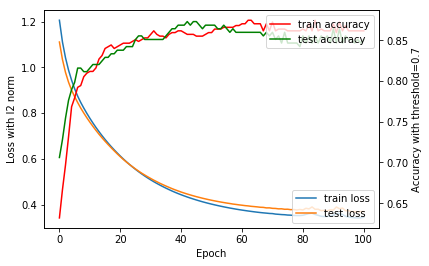

In [3]:
# -*- coding: utf-8 -*-

import numpy as np 
import scipy  
import matplotlib.pyplot as plt

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

import LinearClassifier

data = load_svmlight_file("./resources/australian_scale.txt")
# add interception
X = scipy.sparse.hstack(\
    (scipy.sparse.csr_matrix(np.ones((len(data[1]),1))),data[0]))
Y = data[1].reshape((len(data[1]),1))

num_records,num_features  = np.shape(X) 

X_train, X_test, Y_train, Y_test = train_test_split(\
X, Y, test_size=0.33,random_state=42)
Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

# initialize w
init_w = np.random.normal(size=(num_features,1))

lamda = 0.1
eta = 0.2
C = 1.0
threshold=0.7 
max_iterate = 100

classifier = LinearClassifier.LinearClassifier(init_w, lamda, eta, C, threshold, max_iterate)
classifier.fit(X_train,Y_train)
loss_train = classifier.getLossHistory(X_train,Y_train)
loss_test = classifier.getLossHistory(X_test,Y_test)
accuracy_train = classifier.getScoreHistory(X_train,Y_train)
accuracy_test = classifier.getScoreHistory(X_test,Y_test)


fig, ax = plt.subplots()
ax_e = ax.twinx()
train_loss_line = ax.plot(range(max_iterate+1),loss_train,label='train loss')
test_loss_line = ax.plot(range(max_iterate+1),loss_test,label='test loss')
train_accuracy_line = ax_e.plot(range(max_iterate+1),accuracy_train,'r',label='train accuracy')
test_accuracy_line = ax_e.plot(range(max_iterate+1),accuracy_test,'g',label='test accuracy')

ax.set(xlabel='Epoch', ylabel='Loss with l2 norm')
ax_e.set_ylabel('Accuracy with threshold='+str(threshold))

ax.legend(loc=4)
ax_e.legend(loc=1)
plt.show()



